# Bharat Internship - Task 3 Handwritten Digits Recognition using Deep Learning

Submitted By : **SHIVJI**

### 1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
import keras

### 2. Reading and Understanding the Data

In [3]:
from  tensorflow.keras.datasets import mnist

In [4]:
df = mnist.load_data()

(X_train, y_train), (X_test, y_test) = df

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

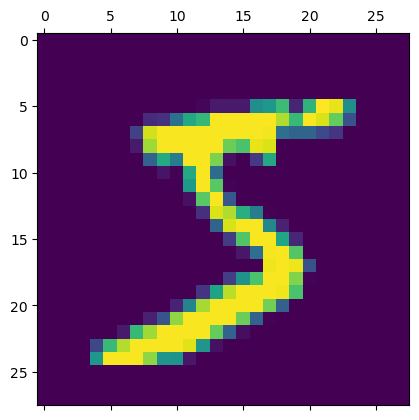

In [6]:
plt.matshow(X_train[0])
plt.show()

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
print("\nTrain labels: ", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


### 3. Data Visualization

In [8]:
# ploting 25 sample mnist digits from train dataset

indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]

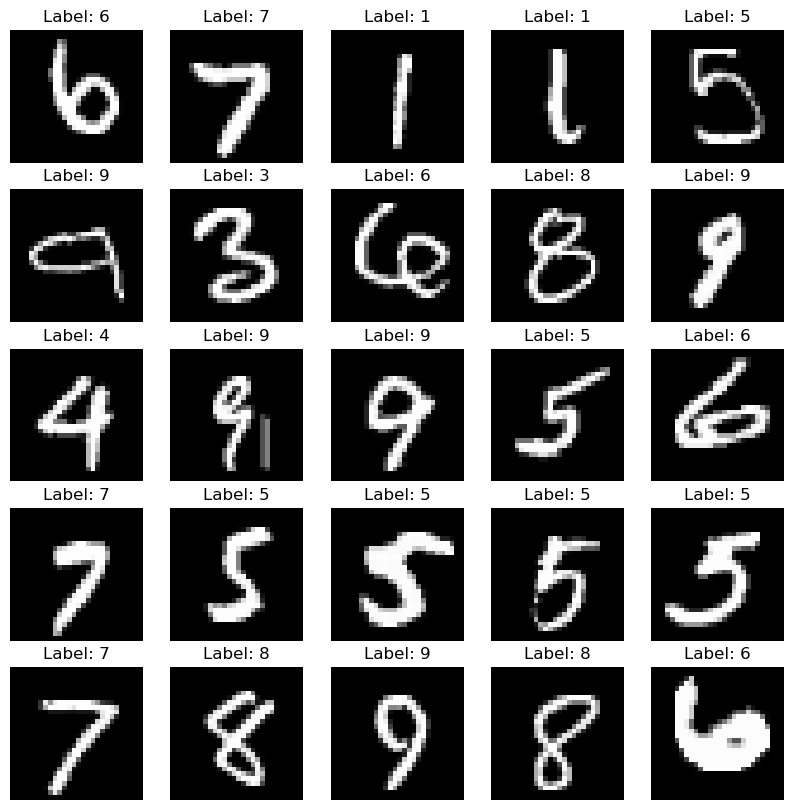

<Figure size 640x480 with 0 Axes>

In [9]:
# plot the 25 mnist digits randomly
plt.figure(figsize=(10,10))
for i in range(len(indexes)):
    plt.subplot(5,5,i+1)
    image = images[i]
    plt.title(f"Label: {labels[i]}")
    plt.imshow(image, cmap="gray")
    plt.axis("off")
plt.show()
plt.savefig("mnist_dataset_sample.png")

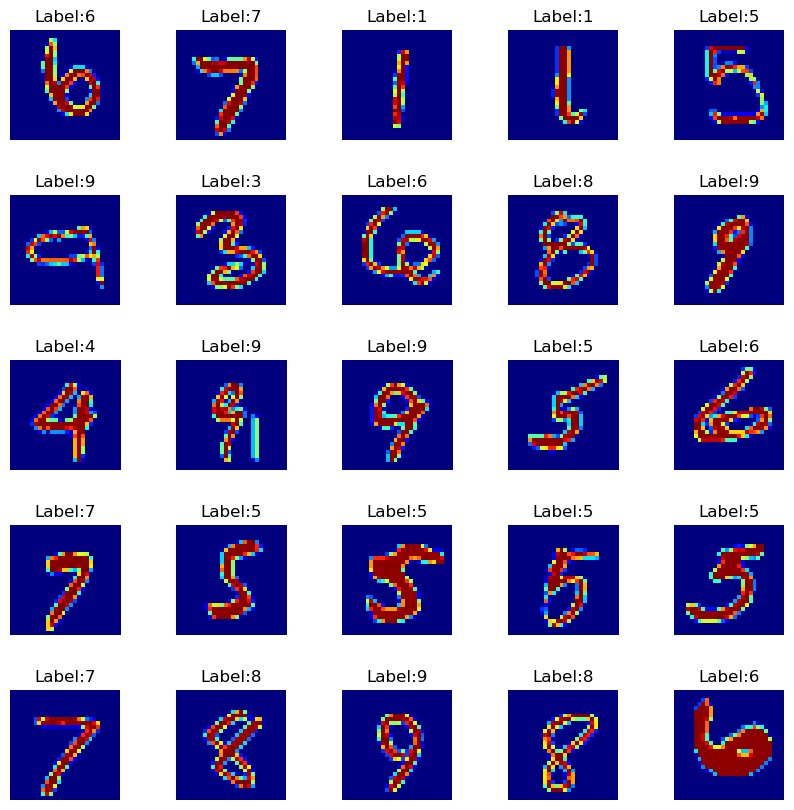

In [10]:
fig,ax=plt.subplots(5,5,figsize=(10,10))
ax=ax.ravel()
for i in range(len(indexes)):
    ax[i].imshow(images[i],cmap="jet")
    ax[i].set_title(f"Label:{labels[i]}")
    ax[i].axis("off")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

### 4. Data Preprocessing

**Performing these operations**

- Reshape the data
- Change the datatype to float32
- Normalize the dataset
- Perform One-Hot Encoding on the labels

**1. Reshape the data**

In [11]:
# train and test set
reshaped = 784
# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# shape of X_train and X_test
(X_train.shape, X_test.shape)

((60000, 784), (10000, 784))

**2. Change the datatype to float**

In [12]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

**3. Normalize the dataset**

In [13]:
X_train = X_train / 255
X_test = X_test / 255

print(X_train.shape[0], ", Train Samples")
print(X_test.shape[0], ", Test Samples")

60000 , Train Samples
10000 , Test Samples


**4. Performing One-Hot Encoding of the Labels**

In [14]:
# total number of labels
num_labels =  len(unique)

y_train = tf.keras.utils.to_categorical(y_train, num_labels)
y_test = tf.keras.utils.to_categorical(y_test, num_labels)

### 5. Model Building 

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.utils import to_categorical

- **Model 1**

In [50]:
def model1():
    
    global hist, model
    model = Sequential()
    model.add(Dense(128,input_shape=(784,), activation="relu" ))
    model.add(Dense(10, name="dense_layer", activation="softmax"))
    model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
    print(model.summary())
    
    hist = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.3)
    return hist, model

def model2():
    # network parameters
    batch_size = 700
    hidden_units = 62
    dropout = 0.20
    global model, hist
    
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hidden_units))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
    hist = model.fit(X_train, y_train, epochs=150, batch_size=batch_size, validation_split=0.3)
    return hist, model

In [51]:
model2()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 62)                48670     
                                                                 
 activation_18 (Activation)  (None, 62)                0         
                                                                 
 dropout_12 (Dropout)        (None, 62)                0         
                                                                 
 dense_20 (Dense)            (None, 62)                3906      
                                                                 
 activation_19 (Activation)  (None, 62)                0         
                                                                 
 dropout_13 (Dropout)        (None, 62)                0         
                                                                 
 dense_21 (Dense)            (None, 10)               

Epoch 48/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0666 - accuracy: 0.9784 - val_loss: 0.1095 - val_accuracy: 0.9710
Epoch 49/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0653 - accuracy: 0.9792 - val_loss: 0.1097 - val_accuracy: 0.9701
Epoch 50/150
60/60 [==============================] - 1s 10ms/step - loss: 0.0638 - accuracy: 0.9791 - val_loss: 0.1097 - val_accuracy: 0.9708
Epoch 51/150
60/60 [==============================] - 1s 10ms/step - loss: 0.0674 - accuracy: 0.9785 - val_loss: 0.1110 - val_accuracy: 0.9708
Epoch 52/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0628 - accuracy: 0.9795 - val_loss: 0.1114 - val_accuracy: 0.9702
Epoch 53/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0608 - accuracy: 0.9803 - val_loss: 0.1130 - val_accuracy: 0.9709
Epoch 54/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0637 - accuracy: 0.9789 - val_loss: 0.1127 - val_accuracy: 0.9708

60/60 [==============================] - 1s 11ms/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 0.1294 - val_accuracy: 0.9715
Epoch 106/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.1249 - val_accuracy: 0.9719
Epoch 107/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 0.1313 - val_accuracy: 0.9712
Epoch 108/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0375 - accuracy: 0.9873 - val_loss: 0.1301 - val_accuracy: 0.9709
Epoch 109/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0377 - accuracy: 0.9873 - val_loss: 0.1377 - val_accuracy: 0.9708
Epoch 110/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0375 - accuracy: 0.9873 - val_loss: 0.1311 - val_accuracy: 0.9707
Epoch 111/150
60/60 [==============================] - 1s 11ms/step - loss: 0.0360 - accuracy: 0.9876 - val_loss: 0.1307 - val_accuracy: 0.9707
Epoch 

(<keras.src.callbacks.History at 0x1c68adbda90>,
 <keras.src.engine.sequential.Sequential at 0x1c68acedfd0>)

- **Save the model**

In [52]:
from keras.models import load_model 
model.save("handwritten_digits.h5") 

### 6. Model Evaluation

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


- **Evaluate Model with Graph : Plot the change in accuracy and loss per epochs**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


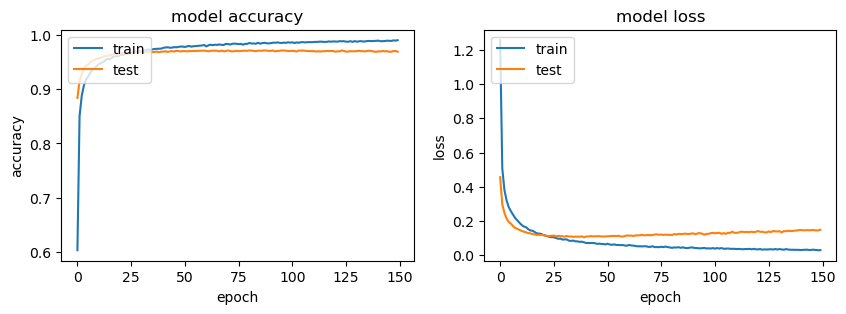

In [54]:
# list all data in training
print(hist.history.keys())
plt.figure(figsize=(10,3))

# summarize training for accuracy
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


# summarize traning for loss
plt.subplot(1,2,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.savefig("Model Accuracy.png")
plt.show()

- **Evaluating model performance with evaluate() method** 

In [55]:
loss, acc = model.evaluate(X_test, y_test, batch_size=60)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

167/167 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9751

Test accuracy: 97.5%


- **Evaluating model using Confusion Matrix** 

In [56]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


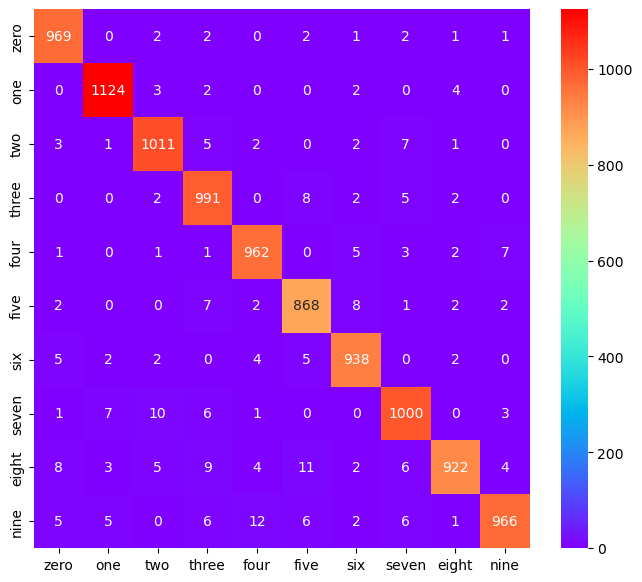

In [57]:
lab=["zero","one","two","three","four","five","six","seven","eight","nine"]
plt.figure(figsize=(8,7))
cf=confusion_matrix(y_true, y_pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="rainbow",xticklabels=lab,yticklabels=lab)
plt.show()

- **Classification Report** 

In [58]:
print(classification_report(y_true,y_pred,target_names=lab))

              precision    recall  f1-score   support

        zero       0.97      0.99      0.98       980
         one       0.98      0.99      0.99      1135
         two       0.98      0.98      0.98      1032
       three       0.96      0.98      0.97      1010
        four       0.97      0.98      0.98       982
        five       0.96      0.97      0.97       892
         six       0.98      0.98      0.98       958
       seven       0.97      0.97      0.97      1028
       eight       0.98      0.95      0.96       974
        nine       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



### 7. Making Prediction on Data

- **Load the Model**

In [59]:
model1 = load_model("handwritten_digits.h5")
model1

- **Making Prediction**

In [60]:
for i in range(30):
    index = np.random.randint(0, X_test.shape[0])
    true_data = np.argmax(y_test[index])  # Get the true class label
    pred_data = y_pred[index]  # Get the predicted class label
    print(f'Index : {index}, True Value : {true_data}, Predicted Value : {pred_data}')    

Index : 5224, True Value : 3, Predicted Value : 3
Index : 4654, True Value : 7, Predicted Value : 7
Index : 7311, True Value : 3, Predicted Value : 3
Index : 7128, True Value : 9, Predicted Value : 9
Index : 5237, True Value : 3, Predicted Value : 3
Index : 7068, True Value : 6, Predicted Value : 6
Index : 5141, True Value : 0, Predicted Value : 0
Index : 4149, True Value : 2, Predicted Value : 2
Index : 6790, True Value : 3, Predicted Value : 3
Index : 6923, True Value : 0, Predicted Value : 0
Index : 3962, True Value : 3, Predicted Value : 3
Index : 3445, True Value : 0, Predicted Value : 0
Index : 6006, True Value : 7, Predicted Value : 7
Index : 2006, True Value : 6, Predicted Value : 6
Index : 7092, True Value : 4, Predicted Value : 4
Index : 2731, True Value : 3, Predicted Value : 3
Index : 6642, True Value : 9, Predicted Value : 9
Index : 1230, True Value : 4, Predicted Value : 4
Index : 3963, True Value : 2, Predicted Value : 2
Index : 442, True Value : 3, Predicted Value : 3
I

### 7. Results and Conclusion 

In conclusion, MNIST handwritten text recognition, driven by neural networks, has been instrumental in the evolution of machine learning and computer vision. The success achieved in this task has significantly contributed to the development of deep learning techniques and their application to a wide range of real-world problems. As technology continues to advance, the insights gained from MNIST will continue to shape the field, fostering the growth of increasingly sophisticated neural network models for text recognition and broader applications.